# Data Preparation
### Steps
1. Convert the data format
2. Examine the product quantity and Remove the outliers
3. Examine the date
4. Examine the product name (Term Frequency, Packet Size, Brand)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pur_beh=pd.read_csv('/Users/cynding/Career/TheForage/Quantium/Task 1/QVI_purchase_behaviour.csv')
trans=pd.read_excel('/Users/cynding/Career/TheForage/Quantium/Task 1/QVI_transaction_data.xlsx')

pur_beh.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [2]:
pur_beh.shape

(72637, 3)

In [3]:
trans.shape

(264836, 8)

In [4]:
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
merged_data=pd.merge(pur_beh,trans,on='LYLTY_CARD_NBR',how='right')
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,43599,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,43605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,43329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,43330,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
merged_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


### 1. Convert the date format

In [7]:
#Convert date into the datetime format
from datetime import date, timedelta
start=date(1899,12,30)

updated_date=[]

# A timedelta object represents a duration, the difference between two dates or times
for date in merged_data["DATE"]:
    delta = timedelta(date)
    updated_date.append(start+delta)

In [8]:
merged_data['DATE']=pd.to_datetime(pd.Series(updated_date))
print(merged_data['DATE'].dtype)

datetime64[ns]


In [15]:
merged_data['DATE'] = merged_data['DATE'].astype(str)

In [16]:
print(merged_data['DATE'].dtype)

object


In [19]:
merged_data['DATE'][0]

'2018-10-17'

In [18]:
merged_data['DATE'].str.extract(r'(\d{4}-\d{2})')

,0
0,2018-10
1,2019-05
2,2019-05
3,2018-08
4,2018-08
...,...
264831,2019-03
264832,2018-08
264833,2018-11
264834,2018-12


In [7]:
'''
merged_data=merged_data[~merged_data['PROD_NAME'].str.contains(r'[Ss]alsa')]
#exclude all the products with the term 'Salsa'
'''

"\nmerged_data=merged_data[~merged_data['PROD_NAME'].str.contains(r'[Ss]alsa')]\n#exclude all the products with the term 'Salsa'\n"

In [8]:
print(merged_data.describe())
print(merged_data.info())

       LYLTY_CARD_NBR     STORE_NBR        TXN_ID       PROD_NBR  \
count    2.648360e+05  264836.00000  2.648360e+05  264836.000000   
mean     1.355495e+05     135.08011  1.351583e+05      56.583157   
std      8.057998e+04      76.78418  7.813303e+04      32.826638   
min      1.000000e+03       1.00000  1.000000e+00       1.000000   
25%      7.002100e+04      70.00000  6.760150e+04      28.000000   
50%      1.303575e+05     130.00000  1.351375e+05      56.000000   
75%      2.030942e+05     203.00000  2.027012e+05      85.000000   
max      2.373711e+06     272.00000  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  
mean        1.907309       7.304200  
std         0.643654       3.083226  
min         1.000000       1.500000  
25%         2.000000       5.400000  
50%         2.000000       7.400000  
75%         2.000000       9.200000  
max       200.000000     650.000000  
<class 'pandas.core.frame.DataFrame'>
Int64In

### 2. Examine the Product Quantity

There are records with PROD_QTY 200, likely to be the outliers.

In [9]:
merged_data[merged_data['PROD_QTY']== 200]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [10]:
#Alternative way
merged_data['PROD_QTY'].value_counts(bins=4).sort_index()

(0.8, 50.75]       264834
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: PROD_QTY, dtype: int64

In [11]:
merged_data.sort_values(by='PROD_QTY',ascending=False).head()
# 2 outliers found

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
217237,201060,YOUNG FAMILIES,Premium,2019-05-18,201,200202,26,Pringles Sweet&Spcy BBQ 134g,5,18.5
238333,219004,YOUNG SINGLES/COUPLES,Mainstream,2018-08-14,219,218018,25,Pringles SourCream Onion 134g,5,18.5
238471,261331,YOUNG SINGLES/COUPLES,Mainstream,2019-05-19,261,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0


In [12]:
merged_data=merged_data[merged_data['PROD_QTY']<6]
# Eliminate the two outliers

### 3. Examine the Date
- Check which day in the year without transaction
- Data Visualization of Sales over December

In [13]:
merged_data['DATE'].describe()

/var/folders/dl/l3zy8j197jn9h7zpll2v7q9w0000gn/T/ipykernel_9377/3948435518.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_data['DATE'].describe()


count                  264834
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [14]:
# Check which day in the year without transaction

pd.date_range(start=merged_data['DATE'].min(),end=merged_data['DATE'].max()).difference(merged_data['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [15]:
a=pd.DataFrame(pd.date_range(start=merged_data['DATE'].min(),end=merged_data['DATE'].max()).rename('DATE'))

check_null_date=a.merge(merged_data,on='DATE',how='left')

check_null_date[check_null_date['DATE']=='2018-12-25']

,DATE,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
129324,2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/dl/l3zy8j197jn9h7zpll2v7q9w0000gn/T/ipykernel_9377/1277521476.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dec=trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1))
/var/folders/dl/l3zy8j197jn9h7zpll2v7q9w0000gn/T/ipykernel_9377/1277521476.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()


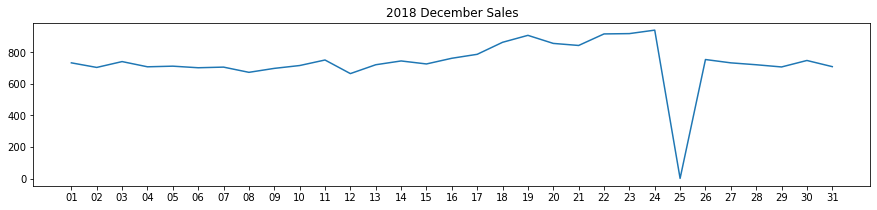

In [16]:
trans_by_date=check_null_date['DATE'].value_counts()

dec=trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) 
                       & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()

# now the index of dec is in datetime format, ’2018-12-01‘

dec.index=dec.index.strftime('%d')
# Change Index to Day of the month as a zero-padded decimal number

ax=dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
#Set the x-axis tick locations

ax.set_xticklabels(dec.index)
#Set the x-axis labels

plt.title('2018 December Sales')
plt.savefig('2018 December Sales.png')
plt.show()

In [17]:
check_null_date['DATE'].value_counts().sort_values().head()

2018-12-25      1
2018-11-25    648
2018-10-18    658
2019-06-13    659
2019-06-24    662
Name: DATE, dtype: int64

The stores are closed on Christmas Day.

In [18]:
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [19]:
merged_data['month']=merged_data['DATE'].dt.strftime('%Y-%m')

In [20]:
sales_month = merged_data.groupby(['month'])['TOT_SALES'].sum()
sales_month

month
2018-07    165275.30
2018-08    158081.05
2018-09    160522.00
2018-10    164415.70
2018-11    160233.70
2018-12    167913.40
2019-01    162642.30
2019-02    150665.00
2019-03    166265.20
2019-04    159845.10
2019-05    156717.65
2019-06    160538.60
Name: TOT_SALES, dtype: float64

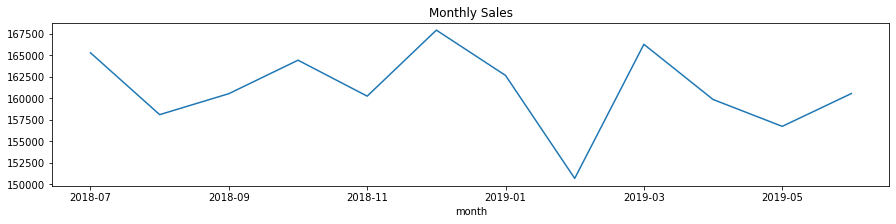

In [21]:
ax=sales_month.plot(figsize=(15,3))

plt.title('Monthly Sales')
plt.savefig('Monthly Sales.png')
plt.show()

The monthly sales was stable throught the year.

### Examine the Product Name
- Term Frequency
- Packet Size
- Brand

In [22]:
merged_data.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

#### Term Frequency

In [23]:
split_words=merged_data['PROD_NAME'].str.replace(r'[0-9]+[gG]','').str.replace(r'[^\w]',' ').str.split()

# the first deletes the description of weight
# the second replaces '&' to the space

print(split_words)

/var/folders/dl/l3zy8j197jn9h7zpll2v7q9w0000gn/T/ipykernel_9377/262229811.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  split_words=merged_data['PROD_NAME'].str.replace(r'[0-9]+[gG]','').str.replace(r'[^\w]',' ').str.split()


0                  [Natural, Chip, Compny, SeaSalt]
1                              [CCs, Nacho, Cheese]
2            [Smiths, Crinkle, Cut, Chips, Chicken]
3           [Smiths, Chip, Thinly, S, Cream, Onion]
4         [Kettle, Tortilla, ChpsHny, Jlpno, Chili]
                            ...                    
264831    [Kettle, Sweet, Chilli, And, Sour, Cream]
264832                 [Tostitos, Splash, Of, Lime]
264833                          [Doritos, Mexicana]
264834     [Doritos, Corn, Chip, Mexican, Jalapeno]
264835                 [Tostitos, Splash, Of, Lime]
Name: PROD_NAME, Length: 264834, dtype: object


In [24]:
library={}

def word_counting(row):
    for word in row:
        if word not in library:
            library[word]=1 
        else:
            library[word]+=1
            
split_words.apply(lambda row: word_counting(row))

print(pd.Series(library).sort_values(ascending=False))

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
Garden       1419
NCC          1419
Fries        1418
Length: 198, dtype: int64


#### Packet Size

                   0
count  264834.000000
mean      182.425512
std        64.325148
min        70.000000
25%       150.000000
50%       170.000000
75%       175.000000
max       380.000000


<AxesSubplot:ylabel='Frequency'>

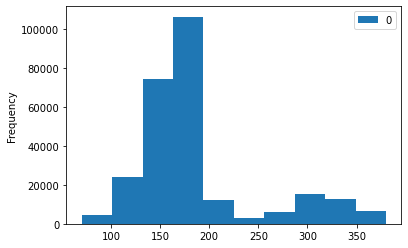

In [25]:
pack_sizes=merged_data['PROD_NAME'].str.extract('(\d+)')
# now the dtype is object
pack_sizes=pack_sizes.astype('float')
print(pack_sizes.describe())
pack_sizes.plot.hist()
#Plot the histogram

In [26]:
merged_data['Packet Size']=merged_data['PROD_NAME'].str.extract('(\d+)')

#### Brands (the first word in product name)

In [27]:
merged_data['PROD_NAME'].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28860
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: PROD_NAME, dtype: int64

We noticed that some product brands are written in more than 1 ways.
eg:
- Dorito & Doritos
- Grain & GrnWves
- Infuzions & Infzns
- Natural & NCC
- Red & RRD
- Smith & Smiths
- Snbts & Sunbites
- WW & Woolworths

In [28]:
merged_data['PROD_NAME'][merged_data['PROD_NAME'].str.split().str[0]=='Grain'].value_counts()

Grain Waves         Sweet Chilli 210g    3167
Grain Waves Sour    Cream&Chives 210G    3105
Name: PROD_NAME, dtype: int64

In [29]:
merged_data['PROD_NAME'][merged_data['PROD_NAME'].str.split().str[0]=='Natural'].value_counts()

Natural Chip Co     Tmato Hrb&Spce 175g    1572
Natural ChipCo Sea  Salt & Vinegr 175g     1550
Natural Chip        Compny SeaSalt175g     1468
Natural ChipCo      Hony Soy Chckn175g     1460
Name: PROD_NAME, dtype: int64

In [30]:
merged_data['PROD_NAME'][merged_data['PROD_NAME'].str.split().str[0]=='Red'].value_counts()

Red Rock Deli Sp    Salt & Truffle 150G     1498
Red Rock Deli Thai  Chilli&Lime 150g        1495
Red Rock Deli SR    Salsa & Mzzrlla 150g    1458
Red Rock Deli Chikn&Garlic Aioli 150g       1434
Name: PROD_NAME, dtype: int64

In [31]:
merged_data['Cleaned_Brand_Names']=merged_data['PROD_NAME'].str.split().str[0]
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,month,Packet Size,Cleaned_Brand_Names
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10,175,Natural
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05,175,CCs
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05,170,Smiths
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08,175,Smiths
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08,150,Kettle


In [32]:
def clean_brand_name(line):
    brand = line['Cleaned_Brand_Names']
    if brand == 'Dorito':
        return 'Doritos'
    elif brand == 'GrnWves' or brand == 'Grain':
        return 'Grain Waves'
    elif brand == 'Infzns':
        return 'Infuzions'
    elif brand == 'Natural' or brand == 'NCC':
        return 'Natural Chips Co'
    elif brand == 'Red' or brand == 'RRD':
        return 'Red Rock Deli'
    elif brand == 'Smith':
        return 'Smiths'
    elif brand == 'Snbts':
        return 'Sunbites'
    elif brand == 'WW':
        return 'Woolworths'
    else:
        return brand

In [33]:
merged_data['Cleaned_Brand_Names']=merged_data.apply(lambda line: clean_brand_name(line),axis=1)

<AxesSubplot:>

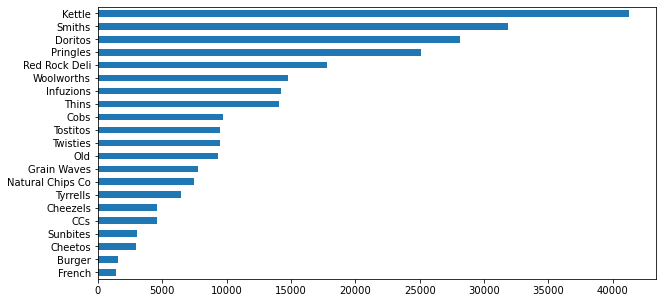

In [34]:
merged_data['Cleaned_Brand_Names'].value_counts(ascending=True).plot.barh(figsize=(10,5))
# Plot a horizontal bar chart

In [35]:
merged_data.isnull().sum()

LYLTY_CARD_NBR         0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
DATE                   0
STORE_NBR              0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
month                  0
Packet Size            0
Cleaned_Brand_Names    0
dtype: int64

In [36]:
merged_data.to_csv('/Users/cynding/Career/TheForage/Quantium/Task 2/merged_data.csv')

- Data Exploration is now complete.
- Data is ready for analysis!

# Examining Consumer Dataset

In [37]:
merged_data['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES',
       'OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'RETIREES',
       'YOUNG FAMILIES'], dtype=object)

In [38]:
merged_data['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48594
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: LIFESTAGE, dtype: int64

In [39]:
merged_data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Budget', 'Mainstream'], dtype=object)

In [40]:
merged_data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    101988
Budget         93157
Premium        69689
Name: PREMIUM_CUSTOMER, dtype: int64

In [41]:
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,month,Packet Size,Cleaned_Brand_Names
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10,175,Natural Chips Co
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05,175,CCs
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05,170,Smiths
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08,175,Smiths
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08,150,Kettle


Some questions need to be answered:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price per customer by segment

In [42]:
print(pur_beh.head())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


First, we start with investigating which sector spend more on the chips in term of the total sales.

In [43]:
grouped_sales=pd.DataFrame(merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].agg(['sum']))
grouped_sales.sort_values(ascending=False,by='sum')

sum
LIFESTAGE              PREMIUM_CUSTOMER       
OLDER FAMILIES         Budget            45065
RETIREES               Mainstream        40518
YOUNG SINGLES/COUPLES  Mainstream        38632
YOUNG FAMILIES         Budget            37111
OLDER SINGLES/COUPLES  Budget            35220
                       Mainstream        34997
                       Premium           33986
RETIREES               Budget            28764
OLDER FAMILIES         Mainstream        27756
YOUNG FAMILIES         Mainstream        25044
RETIREES               Premium           24884
MIDAGE SINGLES/COUPLES Mainstream        22699
YOUNG FAMILIES         Premium           22406
OLDER FAMILIES         Premium           21771
YOUNG SINGLES/COUPLES  Budget            16671
MIDAGE SINGLES/COUPLES Premium           15526
YOUNG SINGLES/COUPLES  Premium           11331
MIDAGE SINGLES/COUPLES Budget             9496
NEW FAMILIES           Budget             5571
                       Mainstream         4319
                       Premium            2957

Budget older families, mainstream retirees, mainstream young singles/couples have the largest market share in the chips market. (In term of the purchase per individual, mainstream midage/couples spend the most on buying chips.)

Let's investigate if that was driven by more customers in the sector.

In [44]:
grouped_count = pd.DataFrame(merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique())
grouped_count.rename(columns={"LYLTY_CARD_NBR": "# customers"},inplace=True)
grouped_count['percent'] = (grouped_count['# customers'] / grouped_count['# customers'].sum()) * 100
grouped_count.sort_values(ascending=False,by='# customers')

# customers    percent
LIFESTAGE              PREMIUM_CUSTOMER                        
YOUNG SINGLES/COUPLES  Mainstream               8088  11.134974
RETIREES               Mainstream               6479   8.919819
OLDER SINGLES/COUPLES  Mainstream               4930   6.787268
                       Budget                   4929   6.785891
                       Premium                  4750   6.539457
OLDER FAMILIES         Budget                   4675   6.436202
RETIREES               Budget                   4454   6.131946
YOUNG FAMILIES         Budget                   4017   5.530316
RETIREES               Premium                  3872   5.330690
YOUNG SINGLES/COUPLES  Budget                   3779   5.202654
MIDAGE SINGLES/COUPLES Mainstream               3340   4.598271
OLDER FAMILIES         Mainstream               2831   3.897516
YOUNG FAMILIES         Mainstream               2728   3.755713
YOUNG SINGLES/COUPLES  Premium                  2574   3.543697
YOUNG FAMILIES         Premium                  2433   3.349579
MIDAGE SINGLES/COUPLES Premium                  2431   3.346825
OLDER FAMILIES         Premium                  2273   3.129302
MIDAGE SINGLES/COUPLES Budget                   1504   2.070599
NEW FAMILIES           Budget                   1112   1.530921
                       Mainstream                849   1.168842
                       Premium                   588   0.809516

There are more mainstream young singles/couples and retirees who bought the chips. Thus, the market share of these two sectors are higher. But more chip buyers is not the main driver of the budget older families sector.

Higher sales may be also driven by more units of chips being bought per each customer. Let's look at the average bags of chips per customer bought across the sectors.

In [46]:
bags_of_chips = pd.DataFrame(merged_data.groupby(['LYLTY_CARD_NBR'])['PROD_QTY'].agg(['sum']))


bags_of_chips = bags_of_chips.merge(pur_beh,on='LYLTY_CARD_NBR',how='left')

df2 = pd.DataFrame(bags_of_chips.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['sum'].agg(['mean']))
df2.sort_values(ascending=False,by='mean')

mean
LIFESTAGE              PREMIUM_CUSTOMER          
OLDER FAMILIES         Mainstream        9.804309
                       Budget            9.639572
                       Premium           9.578091
YOUNG FAMILIES         Budget            9.238486
                       Premium           9.209207
                       Mainstream        9.180352
OLDER SINGLES/COUPLES  Premium           7.154947
                       Budget            7.145466
                       Mainstream        7.098783
MIDAGE SINGLES/COUPLES Mainstream        6.796108
RETIREES               Budget            6.458015
                       Premium           6.426653
MIDAGE SINGLES/COUPLES Premium           6.386672
                       Budget            6.313830
RETIREES               Mainstream        6.253743
NEW FAMILIES           Mainstream        5.087161
                       Premium           5.028912
                       Budget            5.009892
YOUNG SINGLES/COUPLES  Mainstream        4.776459
                       Budget            4.411485
                       Premium           4.402098

In general, Older families and young families bought more bags of chips. This could exaplin the high market share in mainstream older families.

Let's also investigate the average price per bag of chips being bought by the customers, as it is also a driver of the sales.

In [47]:
price_per_unit = pd.DataFrame(merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'PROD_QTY':'mean','TOT_SALES':'mean'}))
#monthly_price_by_id = price_df.groupby(['id', 'price_date']). agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
price_per_unit['price_per_unit']=price_per_unit['TOT_SALES']/price_per_unit['PROD_QTY']
price_per_unit.sort_values(ascending=False,by='price_per_unit')

PROD_QTY  TOT_SALES  price_per_unit
LIFESTAGE              PREMIUM_CUSTOMER                                     
YOUNG SINGLES/COUPLES  Mainstream        1.852498   7.558339        4.080079
MIDAGE SINGLES/COUPLES Mainstream        1.911656   7.647284        4.000346
NEW FAMILIES           Mainstream        1.857634   7.317806        3.939315
                       Budget            1.853910   7.297321        3.936178
RETIREES               Budget            1.892244   7.443445        3.933660
                       Premium           1.900122   7.456174        3.924050
OLDER SINGLES/COUPLES  Premium           1.914273   7.449766        3.891695
NEW FAMILIES           Premium           1.860919   7.231655        3.886067
OLDER SINGLES/COUPLES  Budget            1.913403   7.430315        3.883299
RETIREES               Mainstream        1.887543   7.252262        3.842170
OLDER SINGLES/COUPLES  Mainstream        1.910525   7.282116        3.811578
MIDAGE SINGLES/COUPLES Premium           1.889727   7.112056        3.763535
YOUNG FAMILIES         Budget            1.940749   7.287201        3.754840
                       Premium           1.937732   7.266756        3.750134
MIDAGE SINGLES/COUPLES Budget            1.891633   7.074661        3.739975
OLDER FAMILIES         Budget            1.945812   7.269570        3.736009
                       Mainstream        1.948610   7.262395        3.726962
YOUNG FAMILIES         Mainstream        1.940342   7.189025        3.705029
OLDER FAMILIES         Premium           1.945576   7.208079        3.704855
YOUNG SINGLES/COUPLES  Premium           1.804012   6.629852        3.675060
                       Budget            1.803830   6.615624        3.667542

Mainstream midage and young singles/couples are willing to pay more on a bag of chips, compared to their budget and premium counterparts.This may be due to the premium customers are more likely to buy healthier snacks rather than the chips. As the difference in price per unit is rather small, we carry out statistical test to see if the difference is statistically significant.


In [48]:
from scipy.stats import ttest_ind

In [50]:
price_per_unit = pd.DataFrame(merged_data.groupby(['LYLTY_CARD_NBR']).agg({'PROD_QTY':'mean','TOT_SALES':'mean'}))
price_per_unit = price_per_unit.merge(pur_beh,on='LYLTY_CARD_NBR',how='left')
price_per_unit['price_per_unit']=price_per_unit['TOT_SALES']/price_per_unit['PROD_QTY']
main_sg=price_per_unit[((price_per_unit['LIFESTAGE']=='YOUNG SINGLES/COUPLES')| (price_per_unit['LIFESTAGE']=='MIDAGE SINGLES/COUPLES'))& (price_per_unit['PREMIUM_CUSTOMER']=='Mainstream')]['price_per_unit']
other_sg=price_per_unit[((price_per_unit['LIFESTAGE']=='YOUNG SINGLES/COUPLES')| (price_per_unit['LIFESTAGE']=='MIDAGE SINGLES/COUPLES'))& (price_per_unit['PREMIUM_CUSTOMER']!='Mainstream')]['price_per_unit']
ttest_ind(main_sg, other_sg,alternative='greater')

Ttest_indResult(statistic=41.158998356303115, pvalue=0.0)

The t-test results in a p-value of 0.0, i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.